# generate spectrograms of a sequence of wav files

In [1]:
from glob import glob
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import thinkdsp, thinkplot

In [2]:
# open wave file
#path_root = '/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos/'
path_root = '/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A1/'


files = glob(path_root+'*.wav')
files_num = [int(f.split('son')[-1].strip('.wav')) for f in files]
files_num, files  = (list(t) for t in zip(*sorted(zip(files_num, files))))

#print(files)

## look at one file first

In [3]:
f, num = files[0], files_num[0]
wave = thinkdsp.read_wave(f, normalize=False)
#dir(wave)

In [4]:
# play wave file
#wav.make_audio()
#from IPython.display import Audio
#audio = Audio(data=wave.ys, rate=wave.framerate)
#audio

# does not go through for large files, hence reduce to a segment
#start = 10. # in s
#duration = 30. # in s
#segment = wave.segment(start, duration)
# play
wave.make_audio()


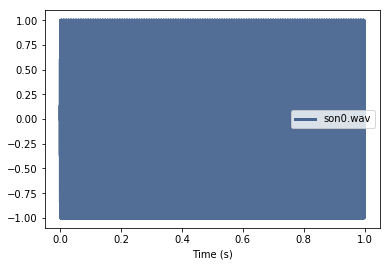

In [5]:
# plot
wave.plot(label='son%d.wav'%num)
thinkplot.config(xlabel='Time (s)')

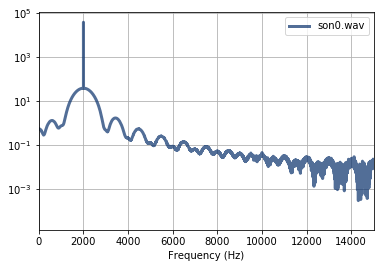

In [6]:
# compute spectrum and plot it
spectrum = wave.make_spectrum()
spectrum.plot(label='son%d.wav'%num)
thinkplot.config(xlabel='Frequency (Hz)', xscale='linear', yscale='log')
fig, ax = plt.gcf(), plt.gca()
ax.set_xlim(0, 15000)
ax.grid()

Time resolution (s) 0.0033628899835796387
Frequency resolution (Hz) 297.36328125


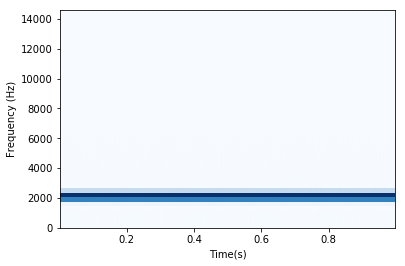

In [7]:
# compute spectrogram and plot it
spectrogram = wave.make_spectrogram(256)
print('Time resolution (s)', spectrogram.time_res)
print('Frequency resolution (Hz)', spectrogram.freq_res)
spectrogram.plot(high=15.e3)
thinkplot.config(xlabel='Time(s)', ylabel='Frequency (Hz)', legend=False)

## process all files

In [8]:
for f, num in zip(files, files_num):
    wave = thinkdsp.read_wave(f, normalize=False)
    lab = 'son%0.2d'%num
    
    # compute spectrum and spectrogram
    spectrum = wave.make_spectrum()
    spectrogram = wave.make_spectrogram(256)

    #
    fig=plt.figure(figsize=(20,5))
    
    ax=plt.subplot(1, 3, 1)
    wave.plot(label=lab)
    thinkplot.config(xlabel='Time (s)')

    ax=plt.subplot(1, 3, 2)
    spectrum.plot(label=lab)
    thinkplot.config(xlabel='Frequency (Hz)', xscale='linear', yscale='log')
    #fig, ax = plt.gcf(), plt.gca()
    ax.set_xlim(0, 15000)
    ax.grid()
    
    ax=plt.subplot(1, 3, 3)
    spectrogram.plot(high=15.e3, label=lab)
    thinkplot.config(xlabel='Time(s)', ylabel='Frequency (Hz)', legend=False)
    ax.grid()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    
    #print('son%0.2d.png'%num)
    fig.savefig('son%0.2d.png'%num)
    plt.close()
    

## try to generate files with lower amplitudes

Writing son0.wav


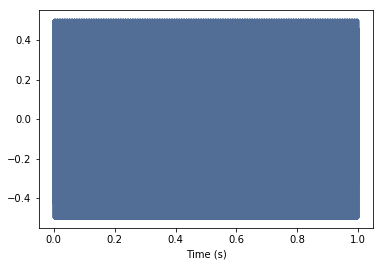

In [9]:
# store
f, num = files[0], files_num[0]

wave = thinkdsp.read_wave(f)
lab = 'son%0.2d'%num

wave.normalize(amp=0.5)
wave.write(filename='son%d.wav'%num)

wave.plot(label=lab)
thinkplot.config(xlabel='Time (s)')


In [8]:
scale=0.7

for f, num in zip(files[:12], files_num[:12]):
    wave = thinkdsp.read_wave(f)
    wave.normalize(amp=scale)
    wave.write(filename='son%d.wav'%(num))

Writing son0.wav
Writing son1.wav
Writing son2.wav
Writing son3.wav
Writing son4.wav
Writing son5.wav
Writing son6.wav
Writing son7.wav
Writing son8.wav
Writing son9.wav
Writing son10.wav
Writing son11.wav


In [9]:
path_root = '/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/'
files = glob(path_root+'*.wav')
files_num = [int(f.split('son')[-1].strip('.wav')) for f in files]
files_num, files  = (list(t) for t in zip(*sorted(zip(files_num, files))))

for f, num in zip(files, files_num):
    print(f)
    wave = thinkdsp.read_wave(f, normalize=False)
    lab = 'son%0.2d'%num
    
    # compute spectrum and spectrogram
    spectrum = wave.make_spectrum()
    spectrogram = wave.make_spectrogram(256)

    #
    fig=plt.figure(figsize=(20,5))
    
    ax=plt.subplot(1, 3, 1)
    wave.plot(label=lab)
    thinkplot.config(xlabel='Time (s)')

    ax=plt.subplot(1, 3, 2)
    spectrum.plot(label=lab)
    thinkplot.config(xlabel='Frequency (Hz)', xscale='linear', yscale='log')
    #fig, ax = plt.gcf(), plt.gca()
    ax.set_xlim(0, 15000)
    ax.grid()
    
    ax=plt.subplot(1, 3, 3)
    spectrogram.plot(high=15.e3, label=lab)
    thinkplot.config(xlabel='Time(s)', ylabel='Frequency (Hz)', legend=False)
    ax.grid()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    
    #print('son%0.2d.png'%num)
    fig.savefig(path_root+'plots/son%0.2d.png'%num)
    plt.close()
    

/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son0.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son1.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son2.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son3.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son4.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son5.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son6.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son7.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son8.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/source/sequence_cos_A0p7/son9.wav
/Users/aponte/Current_projects/cognac/campagnes_techno/2019/